### Student Information
Name:周立淳

Student ID:102062106

---

### Instructions

- Download the dataset provided in this [link](https://archive.ics.uci.edu/ml/datasets/Sentiment+Labelled+Sentences#). The sentiment dataset contains a `sentence` and `score` label. Read what the dataset is about on the link provided before you start exploring it. 


- Then, you are asked to apply each of the data exploration and data operation techniques learned in the [first lab session](https://goo.gl/Sg4FS1) on the new dataset. You don't need to explain all the procedures as we did in the notebook, but you are expected to provide some **minimal comments** explaining your code. You are also expected to use the same libraries used in the first lab session. You are allowed to use and modify the `helper` functions we provided in the first lab session or create your own. Also, be aware that the helper functions may need modification as you are dealing with a completely different dataset. This part is worth 80% of your grade!


- After you have completed the operations, you should attempt the **bonus exercises** provided in the [notebook](https://goo.gl/Sg4FS1) we used for the first lab session. There are six (6) additional exercises; attempt them all, as it is part of your grade (10%). 


- You are also expected to tidy up your notebook and attempt new data operations that you have learned so far in the Data Mining course. Surprise us! This segment is worth 10% of your grade.


- After completing all the above tasks, you are free to remove this header block and submit your assignment following the guide provided in the `README.md` file of the assignment's [repository](https://github.com/omarsar/data_mining_hw_1). 

In [53]:
import pandas as pd
import numpy as np
import nltk
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer
import plotly.plotly as py
import plotly.graph_objs as go
import math
%matplotlib inline

import re
# my functions
import helpers.data_mining_helpers as dmh
import helpers.text_analysis as ta

In [54]:
# categories
categories = ['1', '0']

In [55]:
file1 = open("sentiment labelled sentences/sentiment labelled sentences/imdb_labelled.txt", "r", encoding = 'utf8')
imdb = file1.readlines()
file2 = open("sentiment labelled sentences/sentiment labelled sentences/amazon_cells_labelled.txt", "r", encoding = 'utf8')
amazon = file2.readlines()
file3 = open("sentiment labelled sentences/sentiment labelled sentences/yelp_labelled.txt", "r", encoding = 'utf8')
yelp = file3.readlines()
print(imdb[0:10])
print("\n")
print(amazon[0:10])
print("\n")
print(yelp[0:10])

['A very, very, very slow-moving, aimless movie about a distressed, drifting young man.  \t0\n', 'Not sure who was more lost - the flat characters or the audience, nearly half of whom walked out.  \t0\n', 'Attempting artiness with black & white and clever camera angles, the movie disappointed - became even more ridiculous - as the acting was poor and the plot and lines almost non-existent.  \t0\n', 'Very little music or anything to speak of.  \t0\n', 'The best scene in the movie was when Gerardo is trying to find a song that keeps running through his head.  \t1\n', "The rest of the movie lacks art, charm, meaning... If it's about emptiness, it works I guess because it's empty.  \t0\n", 'Wasted two hours.  \t0\n', 'Saw the movie today and thought it was a good effort, good messages for kids.  \t1\n', 'A bit predictable.  \t0\n', 'Loved the casting of Jimmy Buffet as the science teacher.  \t1\n']


['So there is no way for me to plug it in here in the US unless I go by a converter.\t0\n'

In [56]:
type(imdb[0])

str

- testing catch the data and label or not

In [57]:
a = imdb[0].rstrip('\n')
score = a[-1]
a = a[0:-1]
text = a.rstrip('\t')
text = text.rstrip()
type(a)

str

In [58]:
a = imdb[0].split('\t')
label_test = a[1].split()
training_data_test = a[0].split('\n')

print(training_data_test)
print(label_test)


['A very, very, very slow-moving, aimless movie about a distressed, drifting young man.  ']
['0']


In [59]:
type(a)

list

In [60]:
type(training_data_test)

list

In [61]:
type(label_test)

list

success!!

In [62]:

data = []
label = []
text = []
for t in range(1000):
    a = imdb[t].rstrip('\n')
    _label = a[-1]
    a = a[0:-1]
    _text = a.rstrip('\t')
    _text = _text.rstrip()
    
    label.append(_label)
    text.append(_text)
    data.append(("imdb", _text, _label))
    
    
for t in range(1000):
    a = amazon[t].rstrip('\n')
    _label = a[-1]
    a = a[0:-1]
    _text = a.rstrip('\t')
    _text = _text.rstrip()
    label.append(_label)
    text.append(_text)
    data.append(("amazon", _text, _label))
    
    
for t in range(1000):
    a = yelp[t].rstrip('\n')
    _label = a[-1]
    a = a[0:-1]
    _text = a.rstrip('\t')
    _text = _text.rstrip()
    label.append(_label)
    text.append(_text)
    data.append(("yelp", _text, _label))
    


In [63]:
len(text)

3000

In [64]:
label[:10]

['0', '0', '0', '0', '1', '0', '0', '1', '0', '1']

In [65]:
type(label)

list

In [66]:
len(data)

3000

In [67]:
X = pd.DataFrame.from_records(data, columns= ['source', 'text', 'score'])

In [68]:
len(X)

3000

In [69]:
X[:10]

,source,text,score
0,imdb,"A very, very, very slow-moving, aimless movie ...",0
1,imdb,Not sure who was more lost - the flat characte...,0
2,imdb,Attempting artiness with black & white and cle...,0
3,imdb,Very little music or anything to speak of.,0
4,imdb,The best scene in the movie was when Gerardo i...,1
5,imdb,"The rest of the movie lacks art, charm, meanin...",0
6,imdb,Wasted two hours.,0
7,imdb,Saw the movie today and thought it was a good ...,1
8,imdb,A bit predictable.,0
9,imdb,Loved the casting of Jimmy Buffet as the scien...,1


In [70]:
X.isnull()[:30]

,source,text,score
0,False,False,False
1,False,False,False
2,False,False,False
3,False,False,False
4,False,False,False
5,False,False,False
6,False,False,False
7,False,False,False
8,False,False,False
9,False,False,False


In [71]:
X.isnull().apply(lambda x: dmh.check_missing_values(x))

source    (The amoung of missing records is: , 0)
text      (The amoung of missing records is: , 0)
score     (The amoung of missing records is: , 0)
dtype: object

In [72]:
X.duplicated()

0       False
1       False
2       False
3       False
4       False
5       False
6       False
7       False
8       False
9       False
10      False
11      False
12      False
13      False
14      False
15      False
16      False
17      False
18      False
19      False
20      False
21      False
22      False
23      False
24      False
25      False
26      False
27      False
28      False
29      False
        ...  
2970    False
2971    False
2972    False
2973    False
2974    False
2975    False
2976    False
2977    False
2978    False
2979    False
2980    False
2981    False
2982    False
2983    False
2984    False
2985    False
2986    False
2987    False
2988    False
2989    False
2990    False
2991    False
2992    False
2993    False
2994    False
2995    False
2996    False
2997    False
2998    False
2999    False
dtype: bool

In [73]:
sum(X.duplicated())

17

In [74]:
sum(X.duplicated('text'))

18

In [75]:
X.drop_duplicates(keep=False, inplace=True)

In [76]:
len(X)

2966

- sampling

In [77]:
X_sample = X.sample(n=1000)

In [78]:
len(X_sample)

1000

In [79]:
X_sample[0:10]

,source,text,score
2634,yelp,Ordered burger rare came in we'll done.,0
1184,amazon,I recently had problems where I could not stay...,0
798,imdb,"It is wonderful and inspiring to watch, and I ...",1
1417,amazon,This is the first phone I've had that has been...,0
85,imdb,Give this one a look.,1
2462,yelp,Im in AZ all the time and now have my new spot.,1
726,imdb,It will drive you barking mad!,0
2975,yelp,What happened next was pretty....off putting.,0
2255,yelp,We had 7 at our table and the service was pret...,1
1219,amazon,I'm still infatuated with this phone.,1


In [80]:
X_source_counts = ta.get_tokens_and_frequency(list(X.source))
X_sample_source_counts = ta.get_tokens_and_frequency(list(X_sample.source))

In [81]:
py.iplot(ta.plot_word_frequency(X_source_counts, "source distribution"))

Aw, snap! We don't have an account for ''. Want to try again? You can authenticate with your email address or username. Sign in is not case sensitive.

Don't have an account? plot.ly

Questions? support@plot.ly


PlotlyError: Because you didn't supply a 'file_id' in the call, we're assuming you're trying to snag a figure from a url. You supplied the url, '', we expected it to start with 'https://plot.ly'.
Run help on this function for more information.

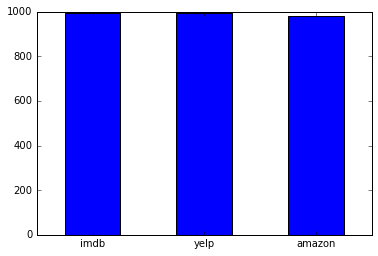

In [82]:
X.source.value_counts().plot(kind="bar", rot=0)

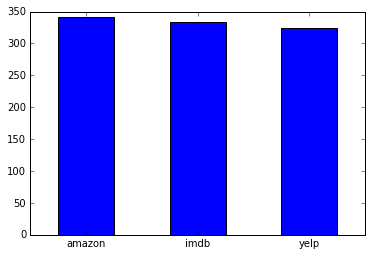

In [83]:
X_sample.source.value_counts().plot(kind="bar", rot=0)

###  Feature Creation

In [ ]:
nltk.download()

In [84]:
# takes a like a minute or two to process
X['unigrams'] = X['text'].apply(lambda x: dmh.tokenize_text(x))

LookupError: 
**********************************************************************
  Resource 'tokenizers/punkt/english.pickle' not found.  Please
  use the NLTK Downloader to obtain the resource:  >>>
  nltk.download()
  Searched in:
    - 'C:\\Users\\立淳/nltk_data'
    - 'C:\\nltk_data'
    - 'D:\\nltk_data'
    - 'E:\\nltk_data'
    - 'C:\\Users\\立淳\\Anaconda3\\nltk_data'
    - 'C:\\Users\\立淳\\Anaconda3\\lib\\nltk_data'
    - 'C:\\Users\\立淳\\AppData\\Roaming\\nltk_data'
    - ''
**********************************************************************